In [2]:
!pip install openai-whisper torch torchaudio matplotlib
!apt install git ffmpeg -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=344e9093251e68b987be7384d9ece20ed8e149618bbeaeffc9ff4b77d9cf3fab
  Stored in directory: /root/.cache/pip/wheels/61/d2/20/09ec9bef734d126cba375b15898010b6cc28578d8afdde5869
Successfully built openai-whisper
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [3]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 50.0 MB/s eta 0:00:00


In [4]:
import yt_dlp

YOUTUBE_URL = "https://www.youtube.com/watch?v=Lzm1sSeJh6k&pp=ygUZ0LvQtdC60YbQuNGPIDUg0LzQuNC90YPRgg%3D%3D"  # ← можно заменить

ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'audio.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '128',
    }],
    'quiet': True
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([YOUTUBE_URL])

print("✅ Аудио сохранено как audio.wav")

✅ Аудио сохранено как audio.wav


In [5]:
import whisper
import torch
import time
import matplotlib.pyplot as plt

# Убедимся, что используется GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Используемое устройство: {device}")

# Список моделей для теста
models_to_test = ["tiny", "base", "small", "medium", "large"]
times = {}
audio_file = "audio.wav"

for model_name in models_to_test:
    print(f"\nЗагрузка модели: {model_name}...")
    model = whisper.load_model(model_name, device=device)

    print(f"Распознавание аудио моделью {model_name}...")
    start_time = time.time()
    result = model.transcribe(audio_file, fp16=(device == "cuda"))
    end_time = time.time()

    elapsed = end_time - start_time
    times[model_name] = elapsed
    print(f"✅ Время: {elapsed:.2f} сек")

    # Освобождаем память
    del model
    torch.cuda.empty_cache()

Используемое устройство: cuda

Загрузка модели: tiny...


100%|██████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 156MiB/s]


Распознавание аудио моделью tiny...
✅ Время: 12.00 сек

Загрузка модели: base...


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 196MiB/s]


Распознавание аудио моделью base...
✅ Время: 16.25 сек

Загрузка модели: small...


100%|████████████████████████████████████████| 461M/461M [00:02<00:00, 210MiB/s]


Распознавание аудио моделью small...
✅ Время: 25.85 сек

Загрузка модели: medium...


100%|█████████████████████████████████████| 1.42G/1.42G [00:19<00:00, 78.0MiB/s]


Распознавание аудио моделью medium...
✅ Время: 46.58 сек

Загрузка модели: large...


100%|█████████████████████████████████████| 2.88G/2.88G [00:49<00:00, 61.8MiB/s]


Распознавание аудио моделью large...
✅ Время: 63.39 сек


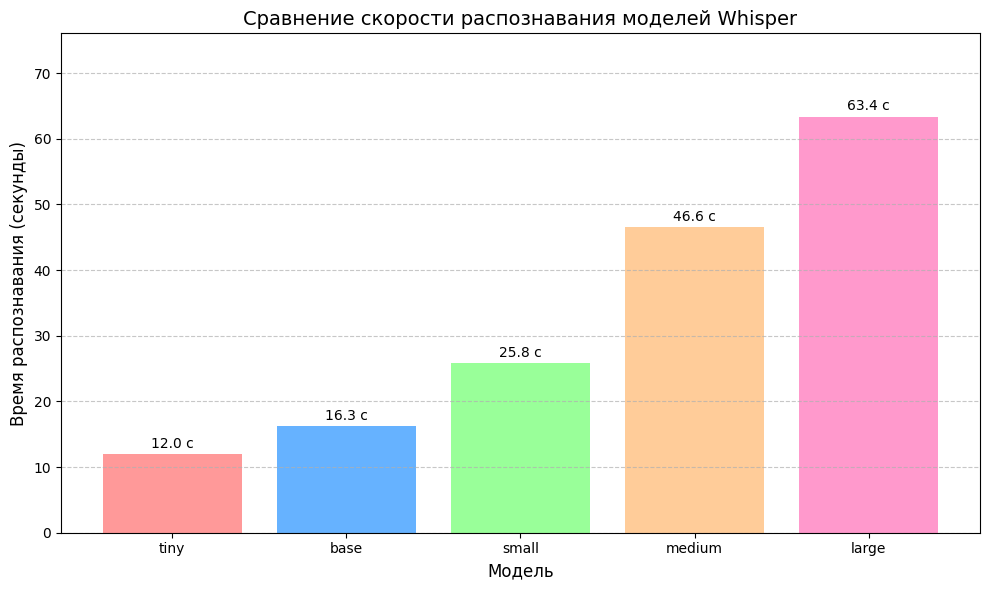

In [6]:
# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
bars = plt.bar(times.keys(), times.values(), color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f} с', ha='center', va='bottom')

plt.title('Сравнение скорости распознавания моделей Whisper', fontsize=14)
plt.xlabel('Модель', fontsize=12)
plt.ylabel('Время распознавания (секунды)', fontsize=12)
plt.ylim(0, max(times.values()) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()